# Handwritten digits classification using Neural Network

## Simple Neural Network with no hidden layers
![](https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/1_digits_recognition/digits_nn.jpg)

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [73]:
len(X_train),len(X_test)

(60000, 10000)

In [74]:
X_train[0].shape #pixels in image

(28, 28)

In [75]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

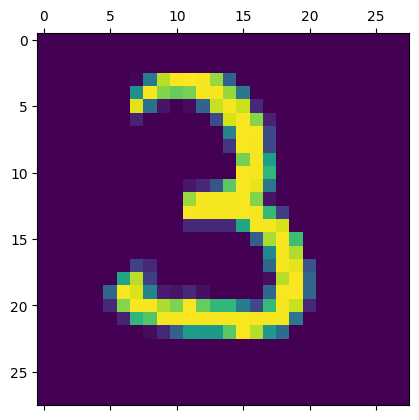

In [76]:
#plotting image
plt.matshow(X_train[546])

In [77]:
y_train[546] #LABEL

3

### Flattening an image

In [78]:
X_train.shape

(60000, 28, 28)

In [79]:
X_train=X_train/255
X_test=X_test/255

In [80]:
#(60000, 28, 28) => (60000,784)
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [81]:
X_train_flatten.shape,X_test_flatten.shape

((60000, 784), (10000, 784))

In [82]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [83]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8067 - loss: 0.7383
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9121 - loss: 0.3173
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9207 - loss: 0.2799
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9229 - loss: 0.2750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9260 - loss: 0.2646


In [84]:
model.evaluate(X_train_flatten,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9292 - loss: 0.2569


[0.2589229941368103, 0.9284833073616028]

In [85]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.7769044e-02, 2.4686778e-07, 3.2874003e-02, 9.4234502e-01,
       1.8534890e-03, 8.4307551e-02, 1.4299147e-06, 9.9979520e-01,
       8.7074496e-02, 5.6805712e-01], dtype=float32)

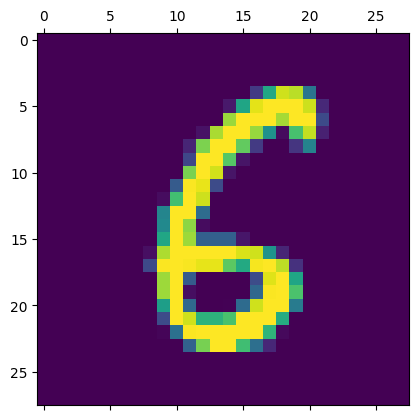

In [86]:
plt.matshow(X_test[508])

In [87]:
np.argmax(y_predicted[508])

6

In [88]:
np.argmax(y_predicted[5078])

8

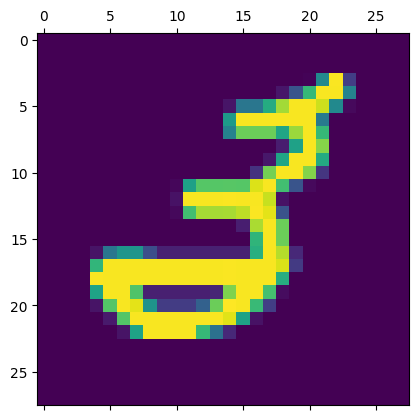

In [89]:
plt.matshow(X_test[5078])

In [90]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [91]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [92]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    1,    0,    5,    6,    5,    2,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   4,    8,  919,   17,    7,    4,   12,   12,   47,    2],
       [   1,    0,   18,  924,    0,   21,    2,   14,   25,    5],
       [   1,    1,    5,    1,  918,    0,   10,    7,   11,   28],
       [  10,    3,    3,   38,    9,  759,   17,   10,   37,    6],
       [   9,    3,    7,    1,    7,   10,  915,    2,    4,    0],
       [   1,    5,   20,    5,    5,    0,    0,  969,    4,   19],
       [   5,    6,    6,   17,    9,   20,   10,   14,  882,    5],
       [  10,    6,    1,    9,   31,    5,    0,   40,   10,  897]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

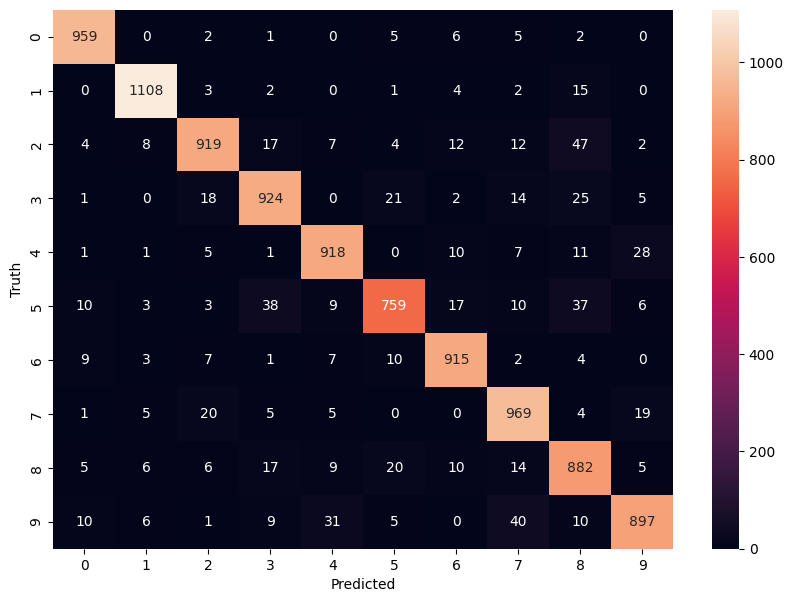

In [93]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding hidden layer

In [94]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8759 - loss: 0.4476
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9612 - loss: 0.1348
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9732 - loss: 0.0906
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9801 - loss: 0.0642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0478
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9880 - loss: 0.0376
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9903 - loss: 0.0313
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9921 - loss: 0.0252
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0214
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9946 - loss: 0.0177


In [95]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0890


[0.07612919062376022, 0.9778000116348267]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

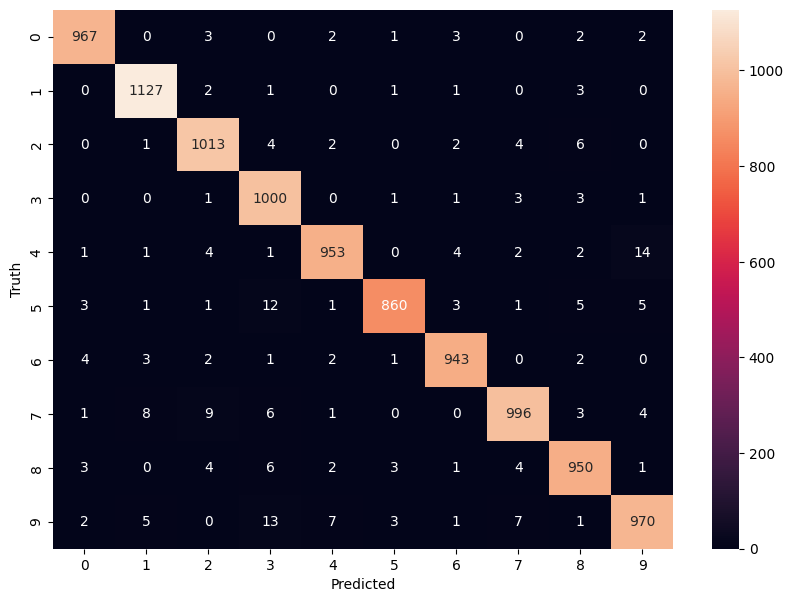

In [96]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [97]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8736 - loss: 0.4607
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9610 - loss: 0.1348
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9729 - loss: 0.0930
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9796 - loss: 0.0702
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9844 - loss: 0.0525
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9873 - loss: 0.0425
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9900 - loss: 0.0349
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0304
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0241
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9945 - loss: 0.0186


In [98]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0951


[0.08481954038143158, 0.9775000214576721]